In [11]:
import numpy as np
from policy_iteration import *
import matplotlib.pyplot as plt

In [12]:
map = construct_map()
map_plot = np.zeros((10,10))
for i in range(10):
    print(map.reshape(10,10)[9-i,])
    map_plot[i] = map.reshape(10,10)[9-i,]


[1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 1]
[1 0 0 0 1 0 0 0 0 1]
[1 0 0 0 1 0 0 1 0 1]
[1 0 0 0 1 0 0 1 0 1]
[1 0 0 0 0 0 0 0 0 1]
[1 0 0 1 1 1 1 0 0 1]
[1 0 0 0 0 0 0 0 2 1]
[1 1 1 1 1 1 1 1 1 1]


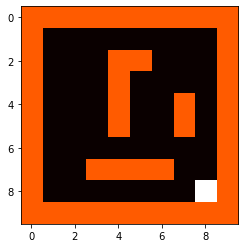

In [13]:
plt.imshow(map_plot, cmap='hot')
plt.savefig('map')

In [14]:
initial_policy = np.full(100, 2)
T = construct_T(initial_policy, map)

In [15]:
rewards = compute_reward_everyCell(initial_policy, map)
rewards_plot = np.zeros((10,10))
for i in range(10):
    rewards_plot[i] = rewards.reshape(10,10)[9-i]

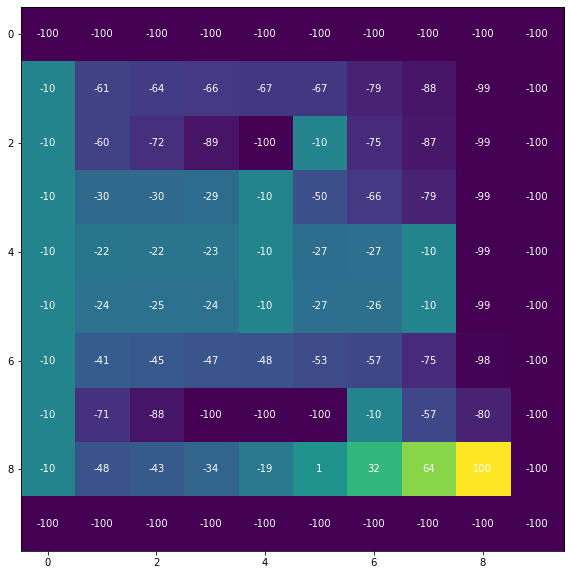

In [16]:
gamma = 0.9
J_pi = policy_evaluation(T,gamma,rewards)
J_pi_plot = np.zeros((10,10))
for i in range(10):
    J_pi_plot[i] = J_pi.reshape(10,10)[9-i]

fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(J_pi_plot, cmap='viridis')
for i in range(10):
    for j in range(10):
        text = ax.text(j, i, int(J_pi_plot[i, j]),
                       ha="center", va="center", color="w")
plt.savefig('J_pi')

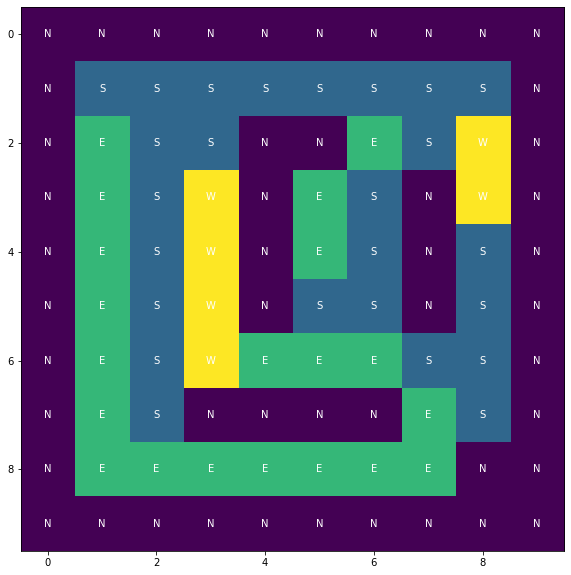

In [17]:
new_policy, J_pi_final = policy_iteration(4, 0.9)
J_pi_final_plot = np.zeros((10,10))
new_policy_plot = np.zeros((10,10))
for i in range(10):
    J_pi_final_plot[i] = J_pi_final.reshape(10,10)[9-i]
    new_policy_plot[i] = new_policy.reshape(10,10)[9-i]

# new_policy_plot[new_policy_plot == 0] = 'N'
# new_policy_plot[new_policy_plot == 1] = 'S'
# new_policy_plot[new_policy_plot == 2] = 'E'
# new_policy_plot[new_policy_plot == 3] = 'W'

direction_dic = {0:'N',1:'S',2:'E',3:'W'}
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(new_policy_plot, cmap='viridis')
for i in range(10):
    for j in range(10):
        direction = direction_dic[new_policy_plot[i,j]]
        text = ax.text(j, i, direction,
                       ha="center", va="center", color="w")
                       
plt.savefig('new_policy')